# GeophPy Workshop: A Basic Processing Workflow

**Welcome!** In this session, we will cover the entire process from raw data to a final, georeferenced map.

# Objectives

**By the end of this tutorial, you will know how to:**
* Load geophysical data from an ASCII file.
* Apply a series of common processing filters (Despike, Destagger, Destripe).
* Georeference your data using Ground Control Points.
* Export the final map to standard formats like GeoTIFF and KML.

## 1. Code Import and Verifications

In [1]:
# --- Imports ---
from geophpy import Survey
import geophpy
import matplotlib.pyplot as plt
import os

# Displays the version to check the environment
print(f"Using GeophPy version: {geophpy.__version__}")

Using GeophPy version: 0.35.1


### 1. Loading the Raw Data

Our first step is to load the data. The file `Mag_ex1.dat` is a simple ASCII text file.

We will use the `Survey.from_file()` method. We don't need to specify the `fileformat` for common extensions like `.dat`; the system will infer it automatically. We only need to provide the column numbers for our X, Y, and Z data.

In [2]:
# --- File Properties ---
# It's a good practice to put data in a subdirectory
data_dir = data_dir = os.path.join('..', 'data')
data_file = 'Mag_ex1.dat'
filepath = os.path.join(data_dir, data_file)
print(filepath)

# --- Load the data using the Survey class method ---
if not os.path.exists(filepath):
    print(f"ERROR: Data file not found at '{filepath}'")
    print("Please make sure you have a 'data' folder with 'Mag_ex1.dat' inside.")
else:
    # We call the main factory method from the Survey class
    survey = Survey.from_file(
        filepath,
        # fileformat='ascii', # Not needed, it will be inferred from the .dat extension
        #delimiter=',',
        skiprows=1,
        x_colnum=0,
        y_colnum=1,
        z_colnum=4
    )

    if survey:
        print(f"Successfully loaded and created Survey object: '{survey.name}'")
    else:
        print(f"Failed to load data from '{data_file}'. Check the error messages above.")

print(survey.points.x, survey.points.y, survey.points.values)

..\data\Mag_ex1.dat
Successfully loaded and created Survey object: 'Mag_ex1'
[58 58 58 ...  0  0  0] [49.887 49.662 49.437 ...  0.631  0.379  0.126] [6.88  3.965 2.031 ... 5.715 6.889 7.614]


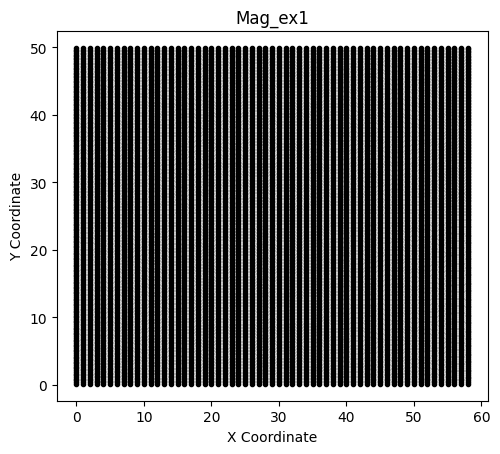

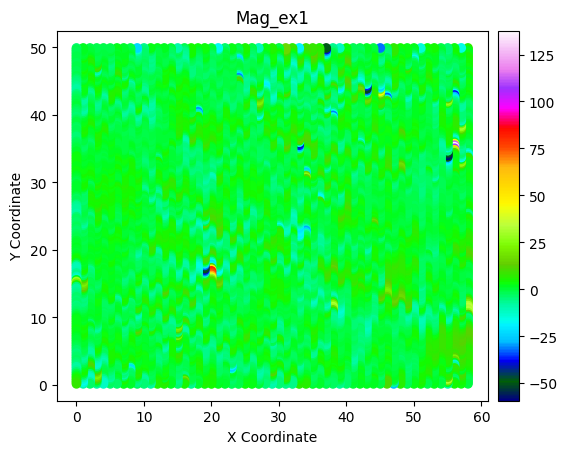

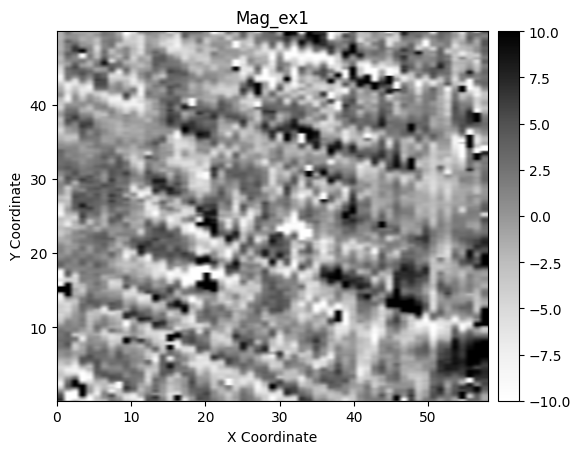

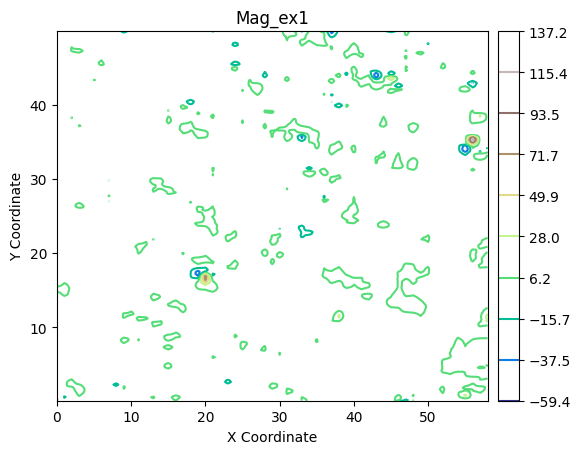

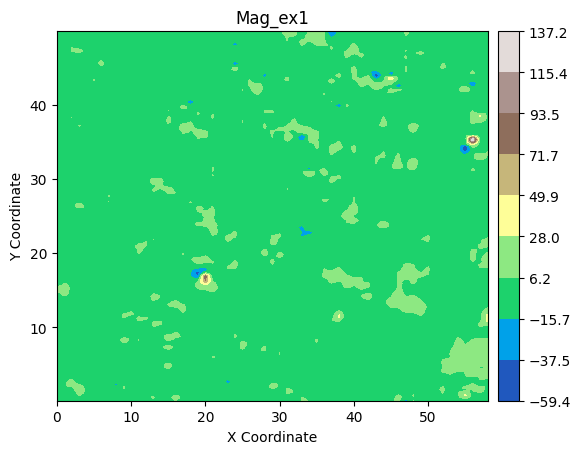

In [3]:
survey.info.cmapname = 'gist_ncar'  # changing default colormap fot the dataset

fig, ax = survey.plot('2D-POSTMAP')
plt.show()

#fig, ax = survey.plot('2D-SCATTER', cmmin=-20, cmmax=20)
fig, ax = survey.plot('2D-SCATTER', cmap='gist_ncar')
fig.show()

survey.interpolate()

# User calls the high-level plot method from the Mixin
fig, ax = survey.plot('2D-SURFACE', cmap='Greys', vmin=-10, vmax=10)
plt.show()

# User calls the high-level plot method from the Mixin
fig, ax = survey.plot('2D-CONTOUR', cmap='terrain')
plt.show()
# User calls the high-level plot method from the Mixin
fig, ax = survey.plot('2D-CONTOURF', cmap='terrain')
plt.show()

### 4. Statistical Visualization (Histograms)

Histograms are a fundamental tool for understanding the distribution of your data values. Our new `PlottingMixin` provides explicit methods to view the histogram for either the raw point data or the final gridded data. This is very useful for comparing how interpolation affects the data's statistical properties.

#### 4a. Histogram of Raw Point Data

First, let's look at the distribution of the original, ungridded measurement values. We use the `plot_points_histogram()` shortcut method.

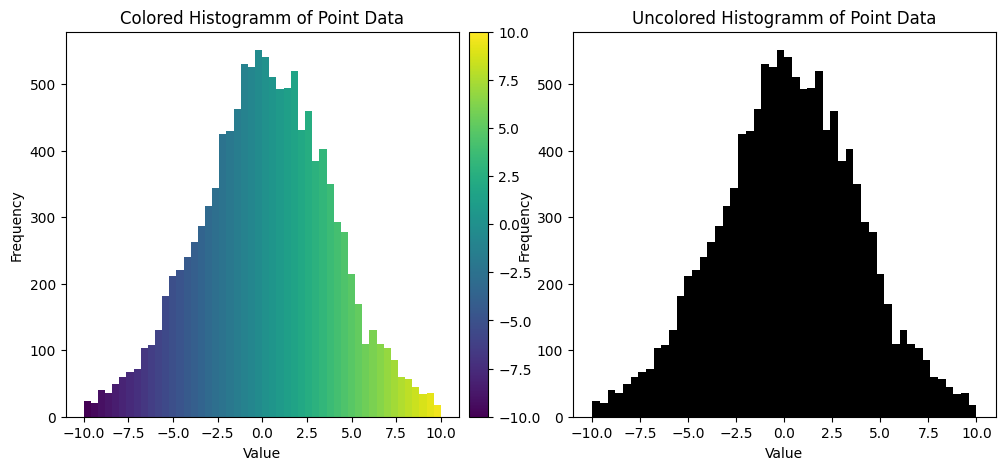

In [4]:
if survey and survey.points:
    # Use the convenient shortcut method
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    #fig, ax = survey.plot_points_histogram(bins=50, colored=True, cmap='viridis', range=(-10, 10))
    survey.plot_points_histogram(fig=fig, ax=ax1, bins=50, colored=True, cmap='viridis', range=(-10, 10))  
    ax1.set_title("Colored Histogramm of Point Data")

    survey.plot_points_histogram(fig=fig, ax=ax2, bins=50, colored=False, cmap='viridis', range=(-10, 10))
    ax2.set_title("Uncolored Histogramm of Point Data")

    plt.show()

#### 4b. Histogram of Gridded Data

Now, let's compare this to the distribution of the data after it has been interpolated onto a grid. We use the `plot_grid_histogram()` method. You will often notice that the distribution becomes smoother after interpolation.

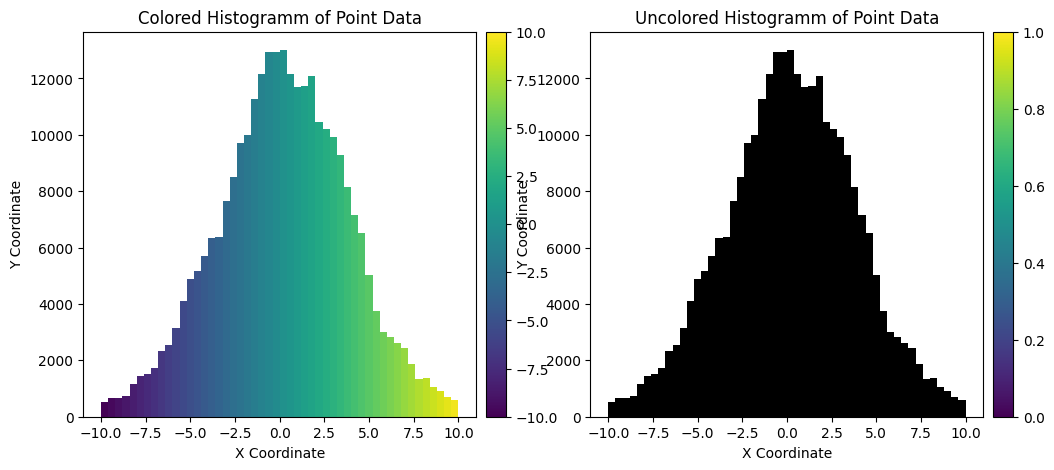

In [ ]:
if survey and survey.grid:
     # Use the convenient shortcut method
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    #fig, ax = survey.plot_points_histogram(bins=50, colored=True, cmap='viridis', range=(-10, 10))
    survey.plot_grid_histogram(fig=fig, ax=ax1, bins=50, colored=True, cmap='viridis', range=(-10, 10))  
    ax1.set_title("Colored Histogramm of Point Data")

    survey.plot_grid_histogram(fig=fig, ax=ax2, bins=50, colored=False, cmap='viridis', range=(-10, 10))
    ax2.set_title("Uncolored Histogramm of Point Data")

    plt.show()

### 5. Saving data

Histograms are a fundamental tool for understanding the distribution of your data values. Our new `PlottingMixin` provides explicit methods to view the histogram for either the raw point data or the final gridded data. This is very useful for comparing how interpolation affects the data's statistical properties.

#### 5a. Saving data Point Data

First, let's look at the distribution of the original, ungridded measurement values. We use the `plot_points_histogram()` shortcut method.

geophpy.core.io - INFO - Reader returned point data. Populating survey.points...
geophpy.core.io - INFO - Data loaded from '..\data\Mag_ex1.dat' into Survey object 'Mag_ex1'.


..\data\Mag_ex1.dat
Successfully created Survey object: 'Mag_ex1'
Successfully created and interpolated Survey object: 'Mag_ex1'


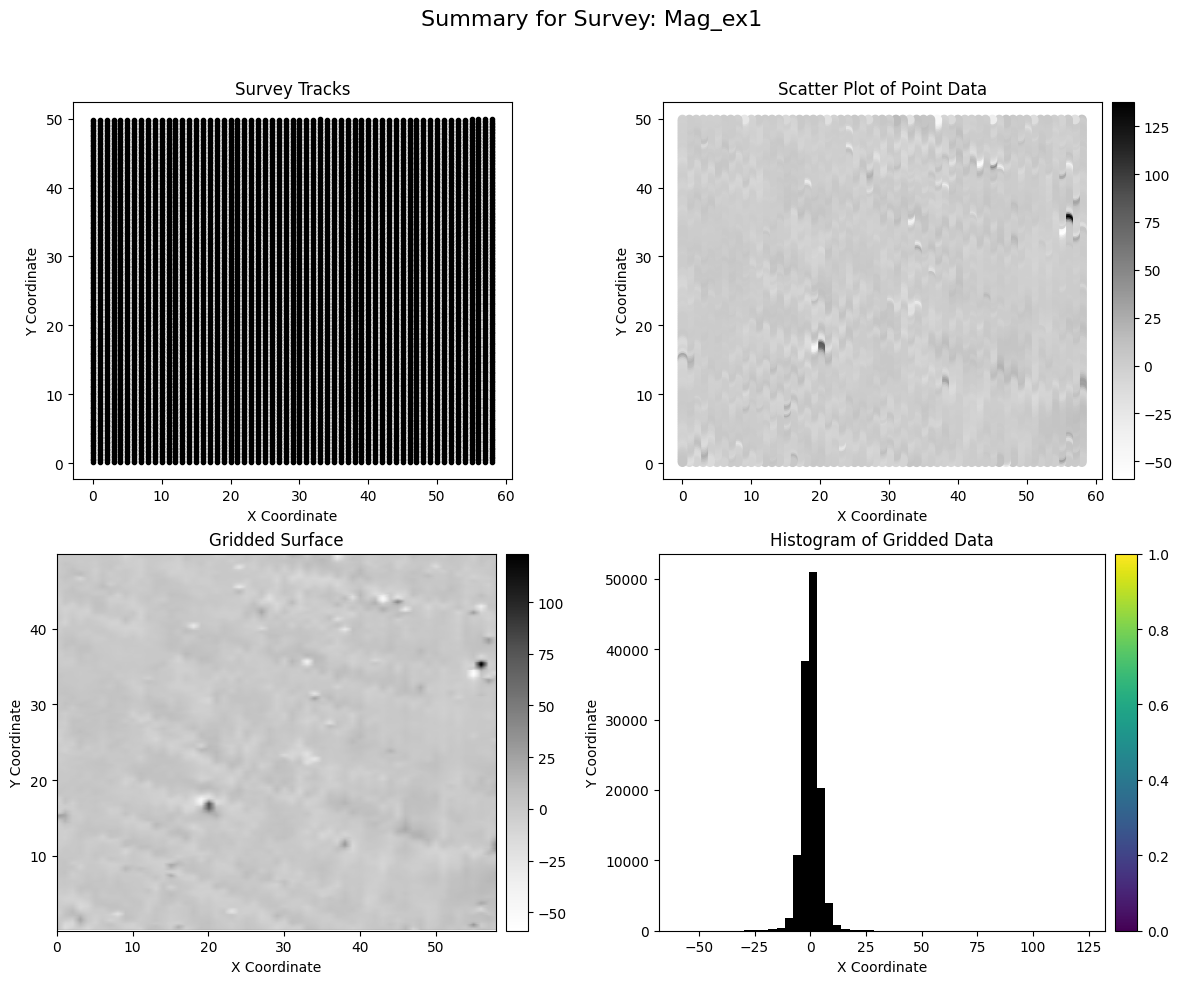

In [2]:
# --- Load the Data ---
data_dir = os.path.join('..', 'data')
data_file = 'Mag_ex1.dat'
filepath = os.path.join(data_dir, data_file)
print(filepath)

column_map = {'x': 0,
              'y': 1,
              'values': 4
              }

survey = Survey.from_file(
    filepath,
    #delimiter=',',
    skiprows=1,
    column_map=column_map
    )

if survey:
    print(f"Successfully created Survey object: '{survey.name}'")
    survey.interpolate(x_step=0.15, y_step=0.15)
    print(f"Successfully created and interpolated Survey object: '{survey.name}'")

if 'survey' in locals() and survey.grid:
    #valmin, valmax = -20, 20
    
    survey.plot_summary()
    plt.show()

#### 4b. Saving data Grid Data

First, let's look at the distribution of the original, ungridded measurement values. We use the `plot_points_histogram()` shortcut method.

file extension is .grd


geophpy.core.io - WARNING - Attribute 'track' is empty and will not be saved.
geophpy.core.io - INFO - Point data successfully saved to '..\data\tmp.dat'.
geophpy.core.io - INFO - Reader returned grid data. Populating survey.grid and survey.info...
geophpy.core.io - INFO - Data loaded from 'tmp.grd' into Survey object 'tmp'.


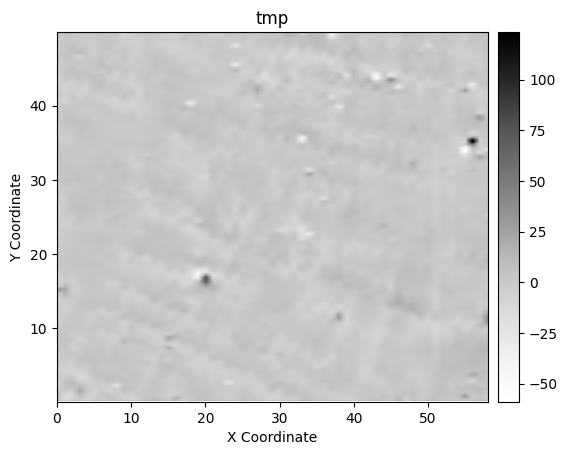

geophpy.core.io - INFO - Reader returned point data. Populating survey.points...
geophpy.core.io - INFO - Data loaded from '..\data\tmp.dat' into Survey object 'tmp'.


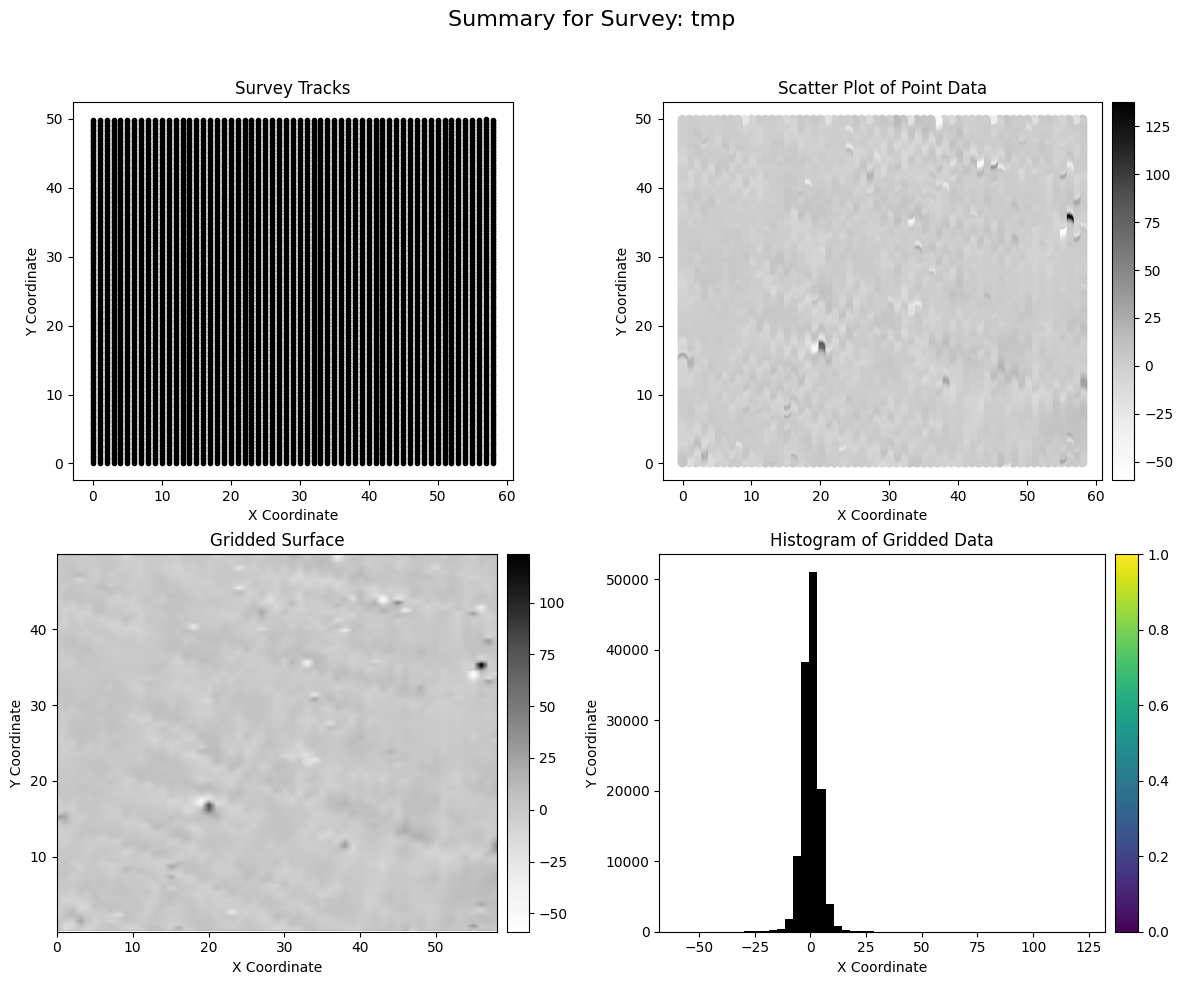

In [ ]:
# saving grd
if 'survey' in locals() and survey.grid:
    savename_grd = 'tmp.grd'
    survey.to_grid_file(savename_grd)

# saving dat
if 'survey' in locals() and survey.points:
    savename_dat = 'tmp.dat'
    survey.to_points_file(savename_dat)


# reading grd
grd_survey = Survey.from_file(savename_grd)
grd_survey.plot_surface()
#grd_survey.plot_summary()
plt.show()

# reading dat
dat_survey = Survey.from_file(savename_dat,
    skiprows=1)
dat_survey.interpolate(x_step=0.15, y_step=0.15)
dat_survey.plot_summary()
plt.show()

#### 4c. Saving data Images

First, let's look at the distribution of the original, ungridded measurement values. We use the `plot_points_histogram()` shortcut method.